# Student data analysis


## General analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Import data and print shape (dimensions).


In [3]:
data = pd.read_csv("student_data.csv")
data.shape


(526, 16)

In [4]:
data.head()


,gender,reason,traveltime,studytime,failures,activities,higher,siblings,freetime,hangouts_p_week,absences,maths,stats,comp_sci,parentedu,god
0,F,course,2,2,0,no,yes,2,3,4,4,F,B,B,Masters,yes
1,F,course,1,2,0,no,yes,3,3,3,2,C,B,B,10th Pass,yes
2,F,other,1,2,0,no,yes,2,3,2,6,B,B+,B,10th Pass,yes
3,F,home,1,3,0,yes,yes,2,2,2,0,B+,B+,B+,Masters,no
4,F,home,1,2,0,no,yes,2,3,2,0,B,B+,B+,Bachelors,yes


Sorting categorical data


In [5]:
data["maths"] = data["maths"].astype("category").cat.add_categories("O")
data["maths"].unique()


['F', 'C', 'B', 'B+', 'A', 'A+', 'D']
Categories (8, object): ['A', 'A+', 'B', 'B+', 'C', 'D', 'F', 'O']

In [6]:
data["comp_sci"] = data["comp_sci"].astype("category")
data["comp_sci"].unique()


['B', 'B+', 'A+', 'A', 'D', 'C', 'F', 'O']
Categories (8, object): ['A', 'A+', 'B', 'B+', 'C', 'D', 'F', 'O']

In [7]:
data["stats"] = data["stats"].astype("category")
data["stats"].unique()


['B', 'B+', 'A', 'A+', 'D', 'C', 'F', 'O']
Categories (8, object): ['A', 'A+', 'B', 'B+', 'C', 'D', 'F', 'O']

In [8]:
data["maths"] = pd.Categorical(
    data["maths"], ["O", "A+", "A", "B+", "B", "C", "D", "F"]
)
data["comp_sci"] = pd.Categorical(
    data["comp_sci"], ["O", "A+", "A", "B+", "B", "C", "D", "F"]
)
data["stats"] = pd.Categorical(
    data["stats"], ["O", "A+", "A", "B+", "B", "C", "D", "F"]
)


In [9]:
data["parentedu"].unique()


array(['Masters', '10th Pass', 'Bachelors', '12th Pass'], dtype=object)

In [10]:
data["parentedu"] = pd.Categorical(
    data["parentedu"], ["10th Pass", "12th Pass", "Bachelors", "Masters"]
)


Print first 5 rows of data.


In [11]:
data.head(5)


,gender,reason,traveltime,studytime,failures,activities,higher,siblings,freetime,hangouts_p_week,absences,maths,stats,comp_sci,parentedu,god
0,F,course,2,2,0,no,yes,2,3,4,4,F,B,B,Masters,yes
1,F,course,1,2,0,no,yes,3,3,3,2,C,B,B,10th Pass,yes
2,F,other,1,2,0,no,yes,2,3,2,6,B,B+,B,10th Pass,yes
3,F,home,1,3,0,yes,yes,2,2,2,0,B+,B+,B+,Masters,no
4,F,home,1,2,0,no,yes,2,3,2,0,B,B+,B+,Bachelors,yes


Printing number of unique values for each object type.


In [12]:
data.select_dtypes("object").nunique()


gender        2
reason        4
activities    2
higher        2
god           2
dtype: int64

Calculate missing data (I have cleaned this data).


In [13]:
data.isnull().sum() / data.shape[0]


gender             0.0
reason             0.0
traveltime         0.0
studytime          0.0
failures           0.0
activities         0.0
higher             0.0
siblings           0.0
freetime           0.0
hangouts_p_week    0.0
absences           0.0
maths              0.0
stats              0.0
comp_sci           0.0
parentedu          0.0
god                0.0
dtype: float64

Calculate descriptive statistics for valid objects.


In [14]:
data.describe(percentiles=[])


,traveltime,studytime,failures,siblings,freetime,hangouts_p_week,absences
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,1.501901,1.979087,0.188213,2.169202,3.186312,3.174905,3.882129
std,0.740010,0.844895,0.545749,0.638363,0.998801,1.169378,4.911152
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,2.000000,0.000000,2.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,3.000000,3.000000,5.000000,5.000000,32.000000


In [15]:
data.loc[(data["absences"] == 0)].shape[0] / data.shape[0] * 100


36.69201520912547

36.69% of students were never absent.


In [16]:
data.loc[(data["siblings"] > 0)].shape[0] / data.shape[0] * 100


96.95817490494296

96.96% of students have atleast one sibling


In [17]:
data.loc[(data["failures"] == 0)].shape[0] / data.shape[0] * 100


86.69201520912547

86.69% students have reported that they have not failed in the previous semester. (The analysis is based on current semester).


## Count analysis of various attributes


### Counting male and female participants


Text(0, 0.5, 'Count')

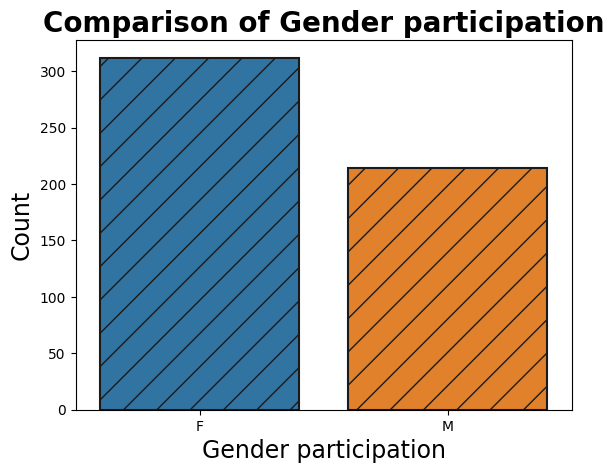

In [18]:
graph = sns.countplot(data, x="gender", edgecolor="0.1", linewidth=1.5, hatch="/")
graph.set_title("Comparison of Gender participation", weight="bold", fontsize=20)
graph.set_xlabel("Gender participation", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


In [19]:
plt.rcParams["figure.figsize"] = (9, 7)
plt.style.use("fivethirtyeight")
sns.set_style("ticks")


### Maths grade


Text(0, 0.5, 'Count')

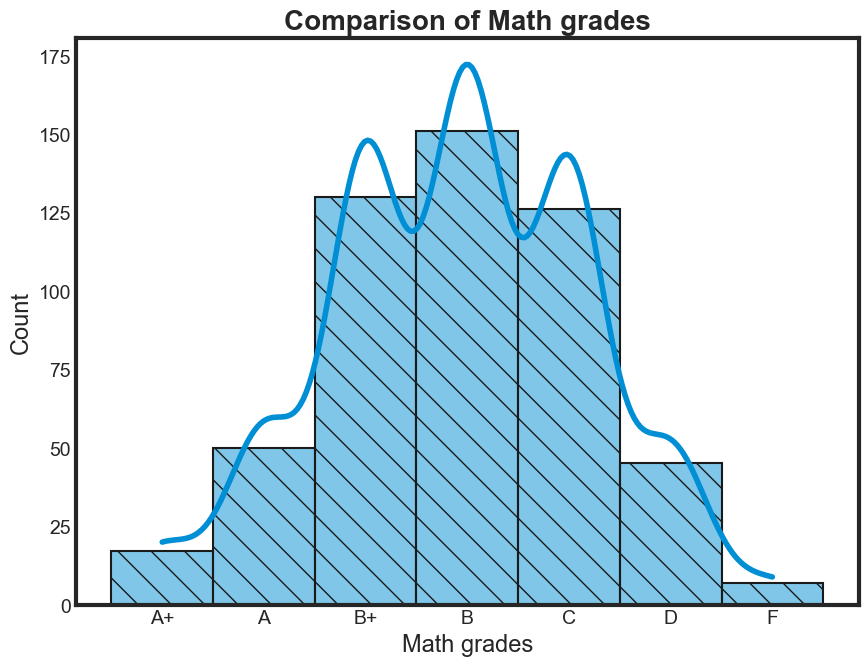

In [20]:
graph = sns.histplot(
    data, x="maths", edgecolor="0.1", linewidth=1.5, hatch="\\", kde=True
)
graph.set_title("Comparison of Math grades", weight="bold", fontsize=20)
graph.set_xlabel("Math grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

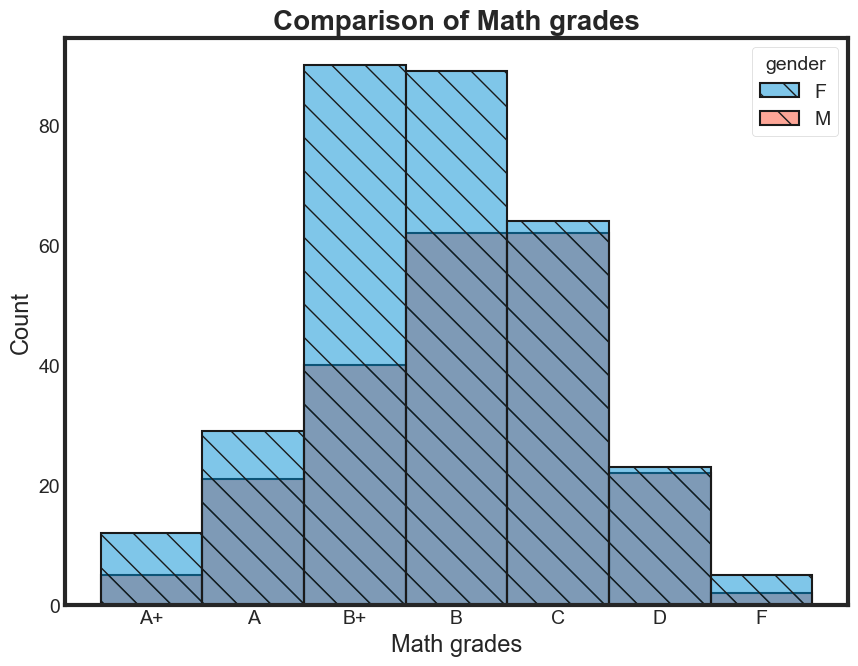

In [21]:
graph = sns.histplot(
    data, x="maths", edgecolor="0.1", linewidth=1.5, hatch="\\", hue="gender"
)
graph.set_title("Comparison of Math grades", weight="bold", fontsize=20)
graph.set_xlabel("Math grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


### Computer Science grade


Text(0, 0.5, 'Count')

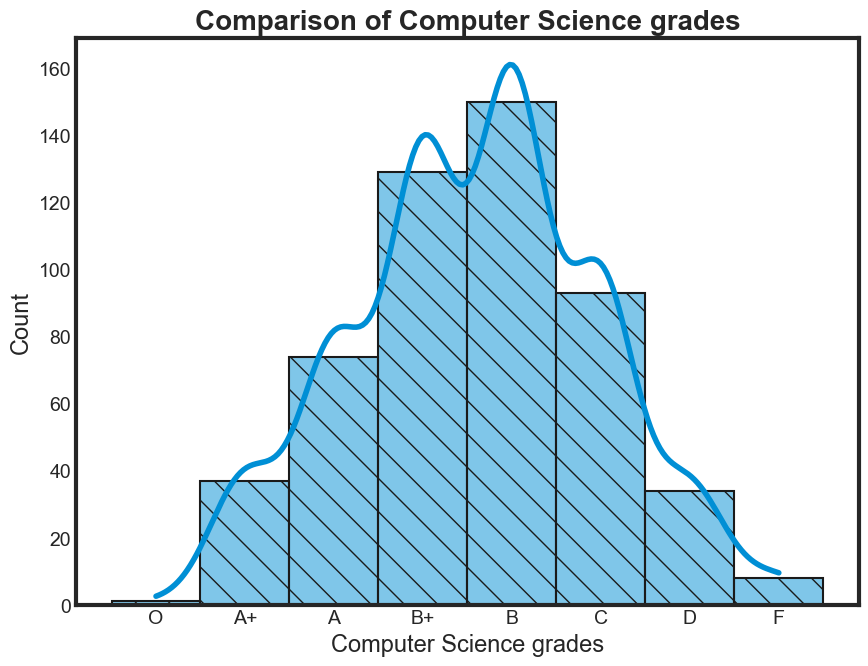

In [22]:
graph = sns.histplot(
    data, x="comp_sci", edgecolor="0.1", linewidth=1.5, hatch="\\", kde=True
)
graph.set_title("Comparison of Computer Science grades", weight="bold", fontsize=20)
graph.set_xlabel("Computer Science grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

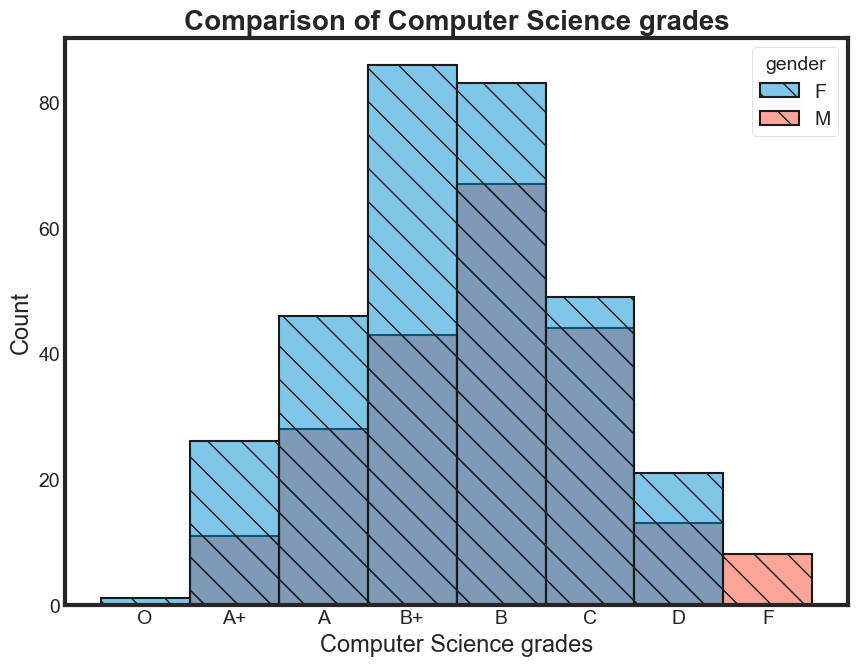

In [23]:
graph = sns.histplot(
    data, x="comp_sci", edgecolor="0.1", linewidth=1.5, hatch="\\", hue="gender"
)
graph.set_title("Comparison of Computer Science grades", weight="bold", fontsize=20)
graph.set_xlabel("Computer Science grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


### Statistics grade


Text(0, 0.5, 'Count')

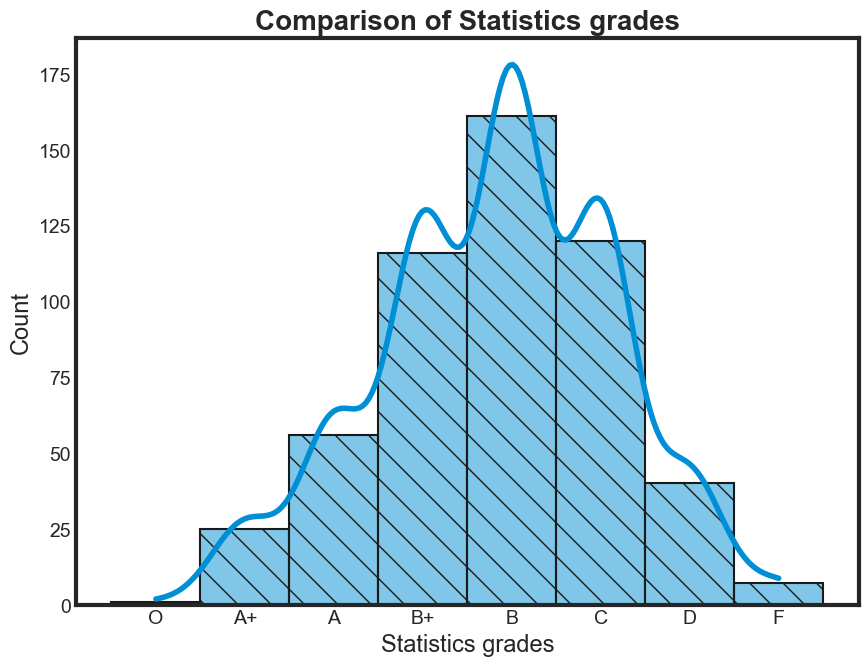

In [24]:
graph = sns.histplot(
    data, x="stats", edgecolor="0.1", linewidth=1.5, hatch="\\", kde=True
)
graph.set_title("Comparison of Statistics grades", weight="bold", fontsize=20)
graph.set_xlabel("Statistics grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

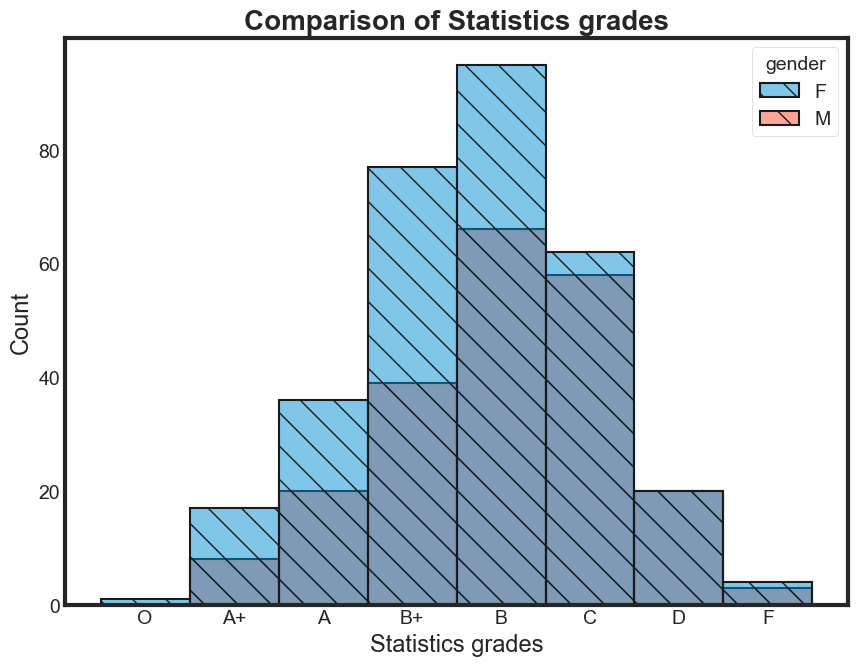

In [25]:
graph = sns.histplot(
    data, x="stats", edgecolor="0.1", linewidth=1.5, hatch="\\", hue="gender"
)
graph.set_title("Comparison of Statistics grades", weight="bold", fontsize=20)
graph.set_xlabel("Statistics grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


All grade curves look similar to a normal distribution curve


### Hangouts per week.


Text(0, 0.5, 'Count')

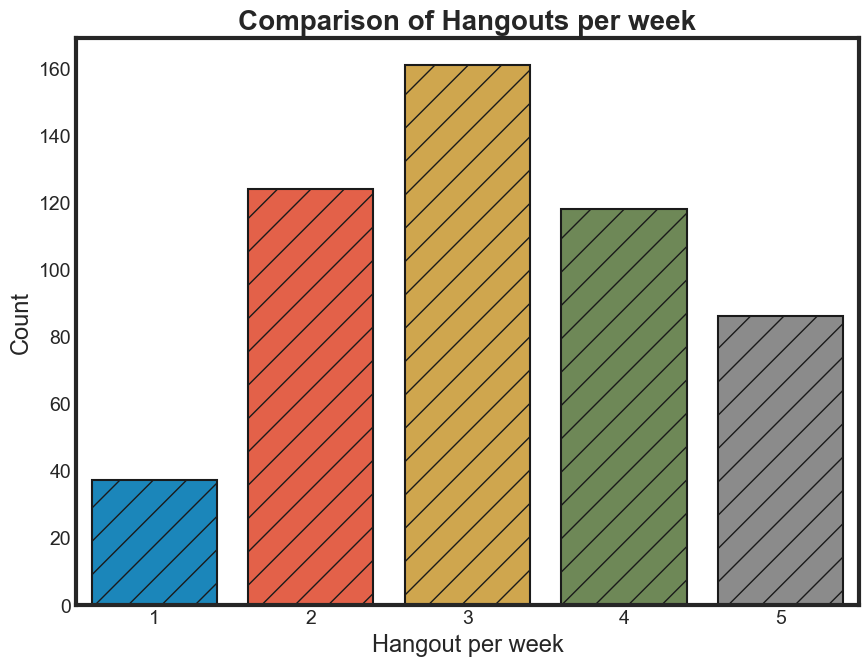

In [26]:
graph = sns.countplot(
    data, x="hangouts_p_week", edgecolor="0.1", linewidth=1.5, hatch="/"
)
graph.set_title("Comparison of Hangouts per week", weight="bold", fontsize=20)
graph.set_xlabel("Hangout per week", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


### Highest level of Parental education.


Text(0, 0.5, 'Count')

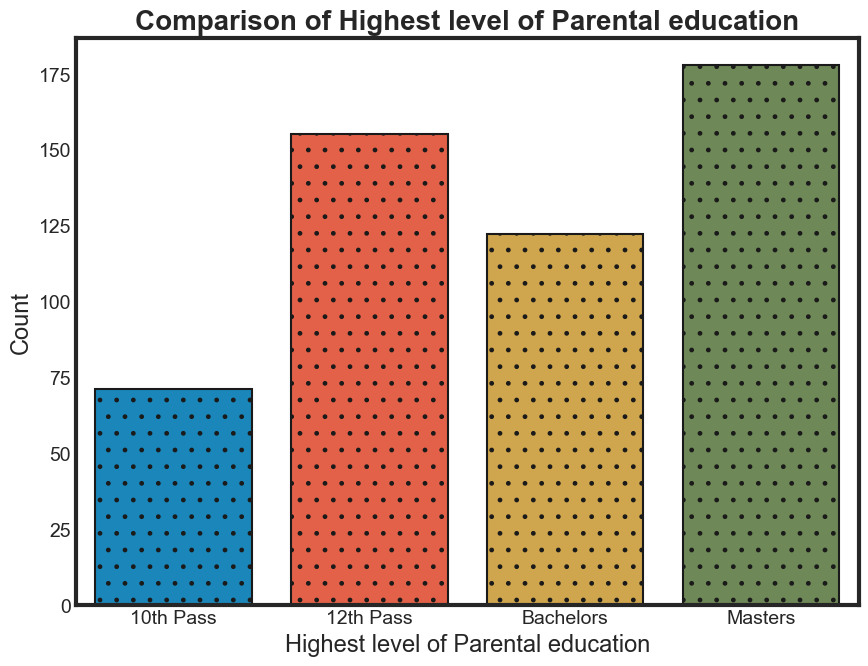

In [27]:
graph = sns.countplot(data, x="parentedu", edgecolor="0.1", linewidth=1.5, hatch=".")
graph.set_title(
    "Comparison of Highest level of Parental education", weight="bold", fontsize=20
)
graph.set_xlabel("Highest level of Parental education", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

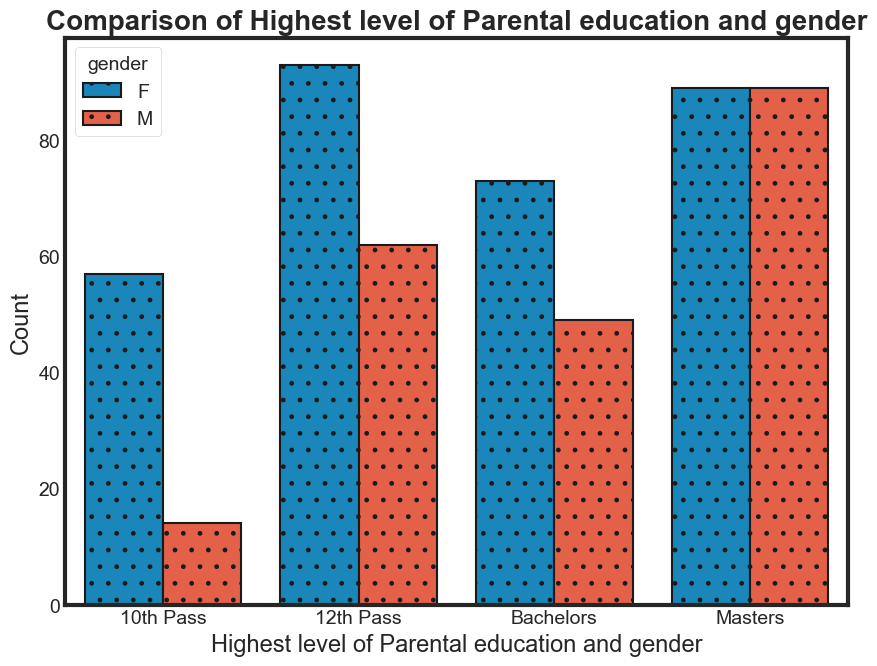

In [28]:
graph = sns.countplot(
    data, x="parentedu", edgecolor="0.1", linewidth=1.5, hatch=".", hue="gender"
)
graph.set_title(
    "Comparison of Highest level of Parental education and gender",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel(
    "Highest level of Parental education and gender", fontweight=20, fontsize=17
)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


### God


Text(0, 0.5, 'Count')

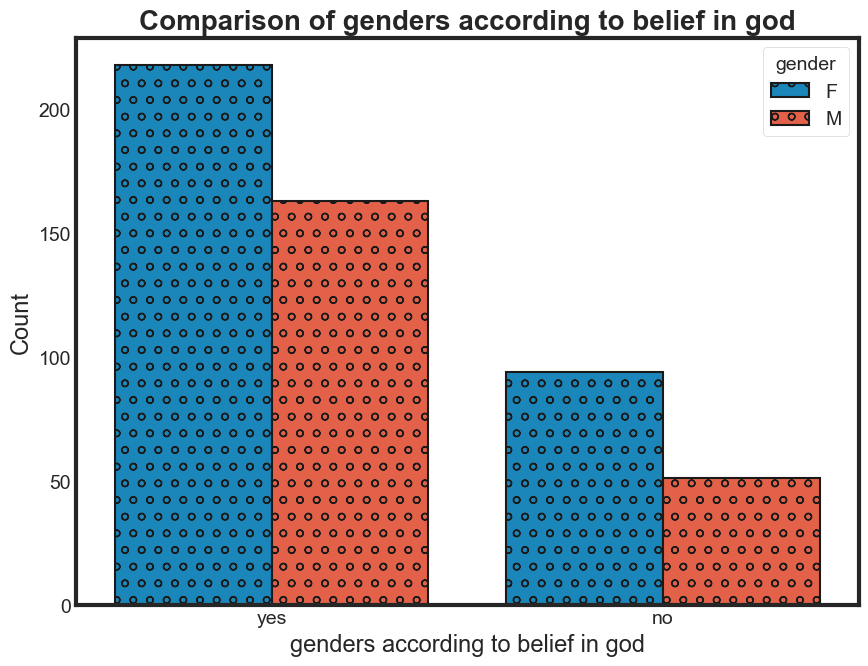

In [29]:
graph = sns.countplot(
    data, x="god", edgecolor="0.1", linewidth=1.5, hatch="o", hue="gender"
)
graph.set_title(
    "Comparison of genders according to belief in god", weight="bold", fontsize=20
)
graph.set_xlabel("genders according to belief in god", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


## Comparision analysis


### Parental level of education


Text(0.5, 20.583333333333293, 'Reason')

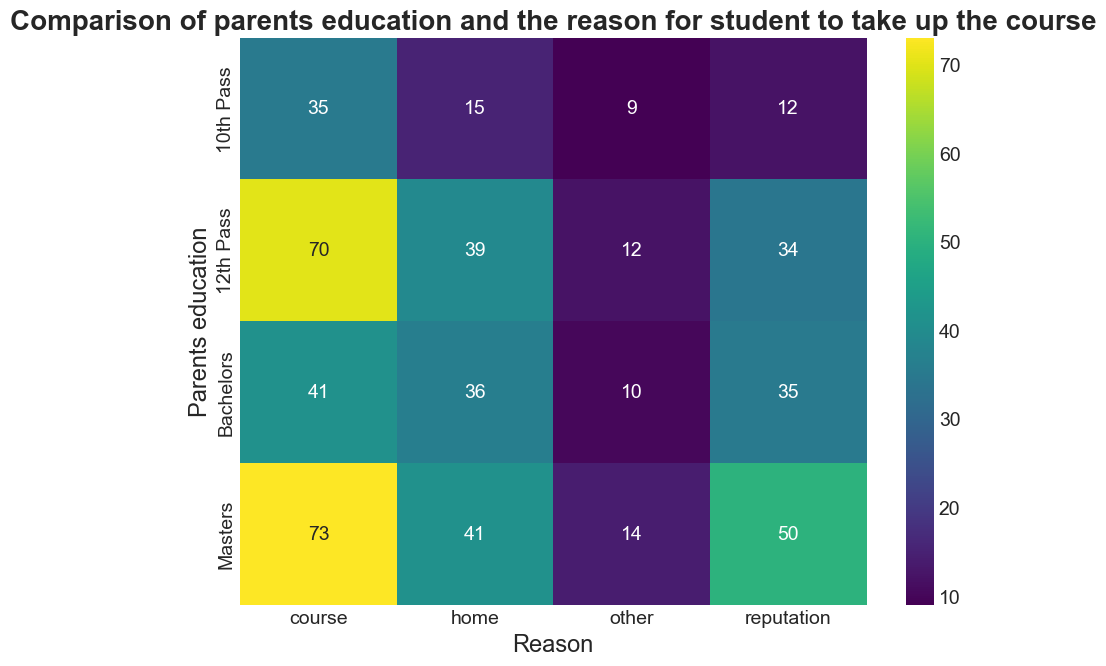

In [30]:
ct = pd.crosstab(data["parentedu"], data["reason"])
graph = sns.heatmap(ct, annot=True, cmap="viridis", fmt="g")
graph.set_title(
    "Comparison of parents education and the reason for student to take up the course",
    weight="bold",
    fontsize=20,
)
graph.set_ylabel("Parents education", fontweight=20, fontsize=17)
graph.set_xlabel("Reason", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

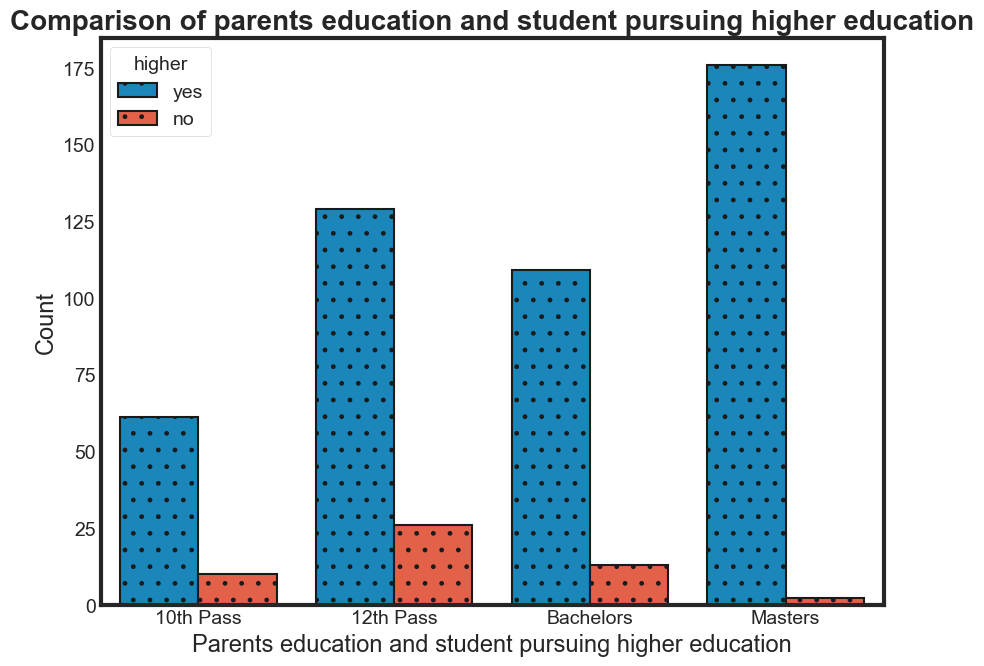

In [31]:
graph = sns.countplot(
    data, x="parentedu", edgecolor="0.1", linewidth=1.5, hatch=".", hue="higher"
)
graph.set_title(
    "Comparison of parents education and student pursuing higher education",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel(
    "Parents education and student pursuing higher education",
    fontweight=20,
    fontsize=17,
)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Studytime')

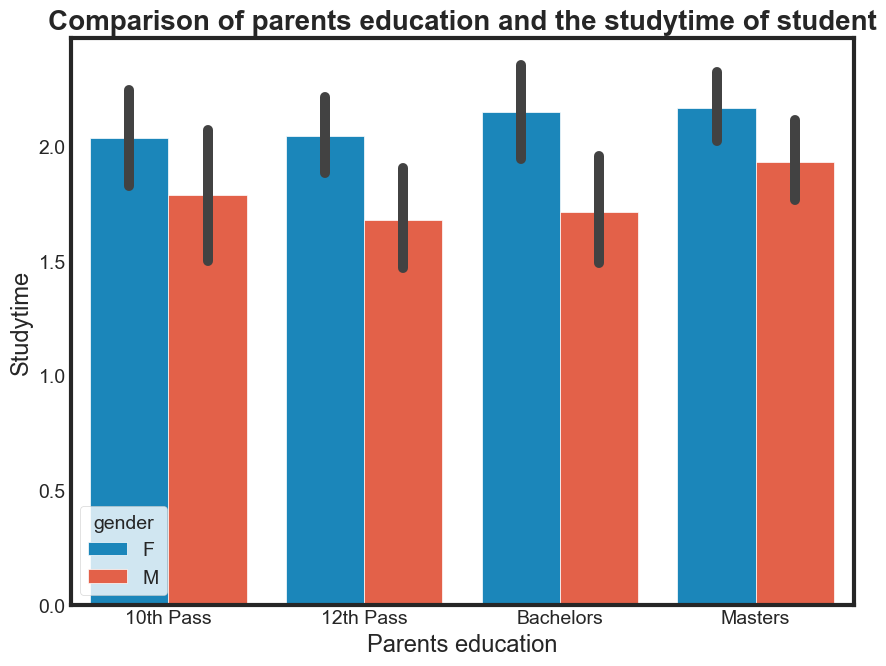

In [32]:
graph = sns.barplot(data, x="parentedu", y="studytime", hue="gender")
graph.set_title(
    "Comparison of parents education and the studytime of student",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel("Parents education", fontweight=20, fontsize=17)
graph.set_ylabel("Studytime", fontweight=20, fontsize=17)


Men in general studied less, especially those whose parents passed 12th studied the least


Text(0.5, 20.583333333333293, 'Reason')

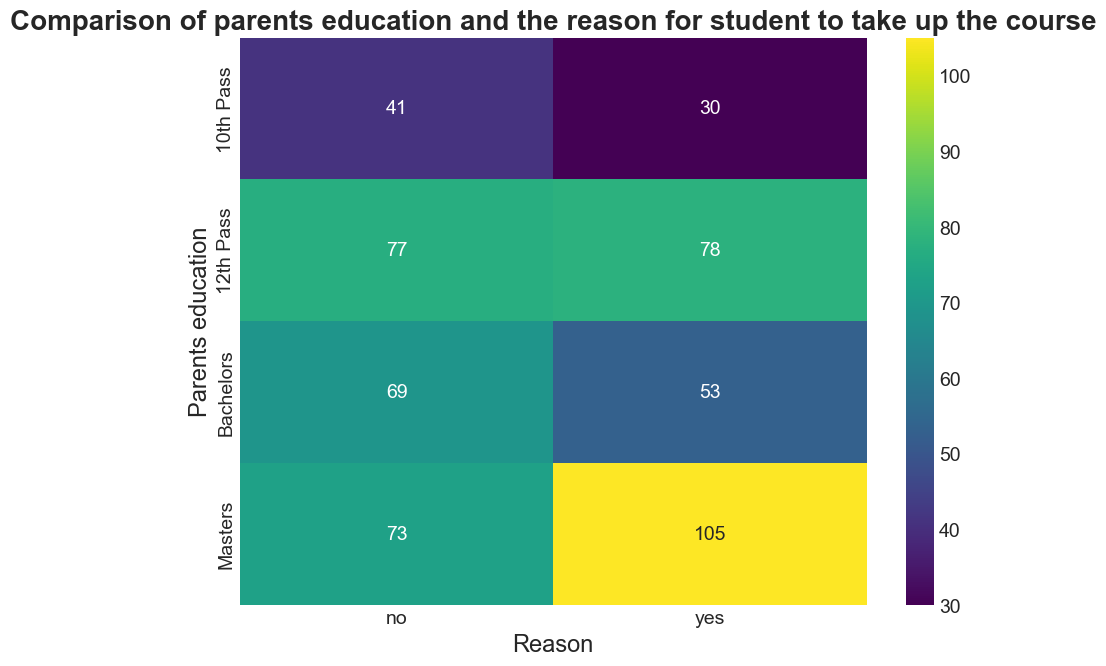

In [33]:
ct = pd.crosstab(data["parentedu"], data["activities"])
graph = sns.heatmap(ct, annot=True, cmap="viridis", fmt="g")
graph.set_title(
    "Comparison of parents education and the reason for student to take up the course",
    weight="bold",
    fontsize=20,
)
graph.set_ylabel("Parents education", fontweight=20, fontsize=17)
graph.set_xlabel("Reason", fontweight=20, fontsize=17)


### Grades


#### Converting grades into gpa


In [34]:
def getgpa(grade):
    if grade == "O":
        return 10
    elif grade == "A+":
        return 9
    elif grade == "A":
        return 8
    elif grade == "B+":
        return 7
    elif grade == "B":
        return 6
    elif grade == "C":
        return 5
    elif grade == "D":
        return 4
    else:
        return 0


data["maths_gpa"] = data["maths"].apply(getgpa)
data["comp_sci_gpa"] = data["comp_sci"].apply(getgpa)
data["stats_gpa"] = data["stats"].apply(getgpa)


In [35]:
data[["maths", "maths_gpa"]].head()


,maths,maths_gpa
0,F,0
1,C,5
2,B,6
3,B+,7
4,B,6


In [36]:
data[["comp_sci", "comp_sci_gpa"]].head()


,comp_sci,comp_sci_gpa
0,B,6
1,B,6
2,B,6
3,B+,7
4,B+,7


In [37]:
data[["stats", "stats_gpa"]].head()


,stats,stats_gpa
0,B,6
1,B,6
2,B+,7
3,B+,7
4,B+,7


#### Calculating overall grade


In [64]:
def overall_gpa(row):
    if row["maths_gpa"] and row["comp_sci_gpa"] and row["stats_gpa"]:
        return round((row["maths_gpa"] + row["comp_sci_gpa"] + row["stats_gpa"]) / 3)
    else:
        return 0


data["overall_gpa"] = data.apply(overall_gpa, axis=1)
data[["overall_gpa", "maths_gpa", "stats_gpa", "comp_sci_gpa"]].head()


,overall_gpa,maths_gpa,stats_gpa,comp_sci_gpa
0,0,0,6,6
1,6,5,6,6
2,6,6,7,6
3,7,7,7,7
4,7,6,7,7


In [39]:
def getgrade(gpa):
    if gpa == 10:
        return "O"
    elif gpa == 9:
        return "A+"
    elif gpa == 8:
        return "A"
    elif gpa == 7:
        return "B+"
    elif gpa == 6:
        return "B"
    elif gpa == 5:
        return "C"
    elif gpa == 4:
        return "D"
    else:
        return "F"


data["overall"] = data["overall_gpa"].apply(getgrade)
data["overall"] = pd.Categorical(
    data["overall"], ["O", "A+", "A", "B+", "B", "C", "D", "F"]
)
data["overall"].head()


0     F
1     B
2     B
3    B+
4    B+
Name: overall, dtype: category
Categories (8, object): ['O', 'A+', 'A', 'B+', 'B', 'C', 'D', 'F']

#### Analyzing overall grade


Text(0, 0.5, 'Count')

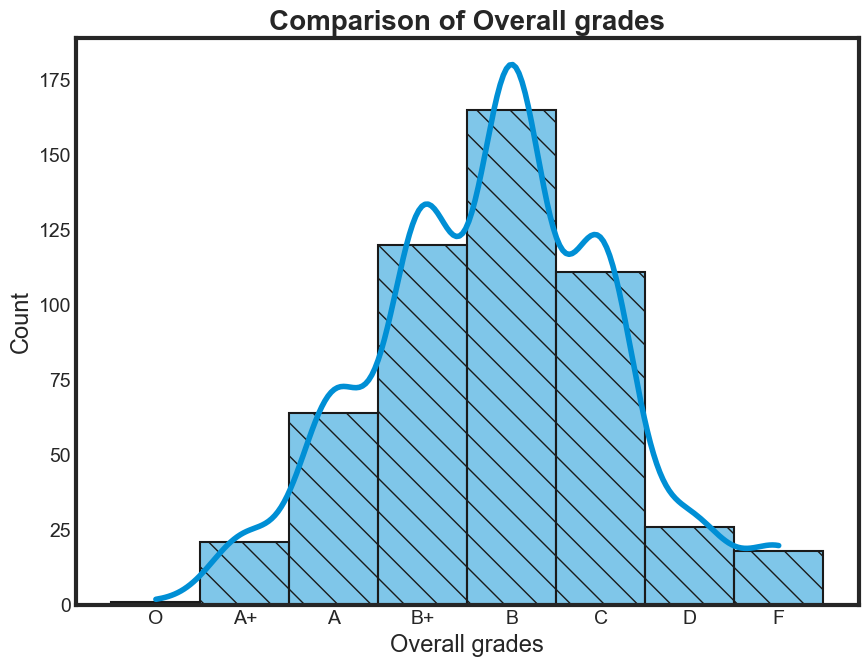

In [40]:
graph = sns.histplot(
    data, x="overall", edgecolor="0.1", linewidth=1.5, hatch="\\", kde=True
)
graph.set_title("Comparison of Overall grades", weight="bold", fontsize=20)
graph.set_xlabel("Overall grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

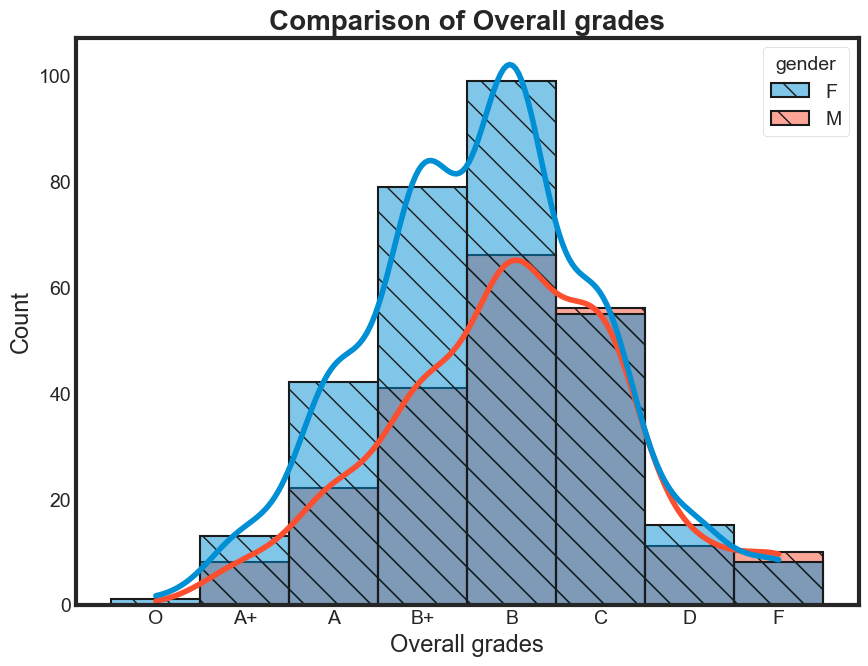

In [41]:
graph = sns.histplot(
    data,
    x="overall",
    edgecolor="0.1",
    linewidth=1.5,
    hatch="\\",
    kde=True,
    hue="gender",
)
graph.set_title("Comparison of Overall grades", weight="bold", fontsize=20)
graph.set_xlabel("Overall grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


#### Failed student vs passed student


In [42]:
def Pass(grade):
    if grade == "F":
        return "fail"
    else:
        return "pass"


data["overall_status"] = data["overall"].apply(Pass)
data["overall_status"].head()


0    fail
1    pass
2    pass
3    pass
4    pass
Name: overall_status, dtype: object

Text(0, 0.5, 'Count')

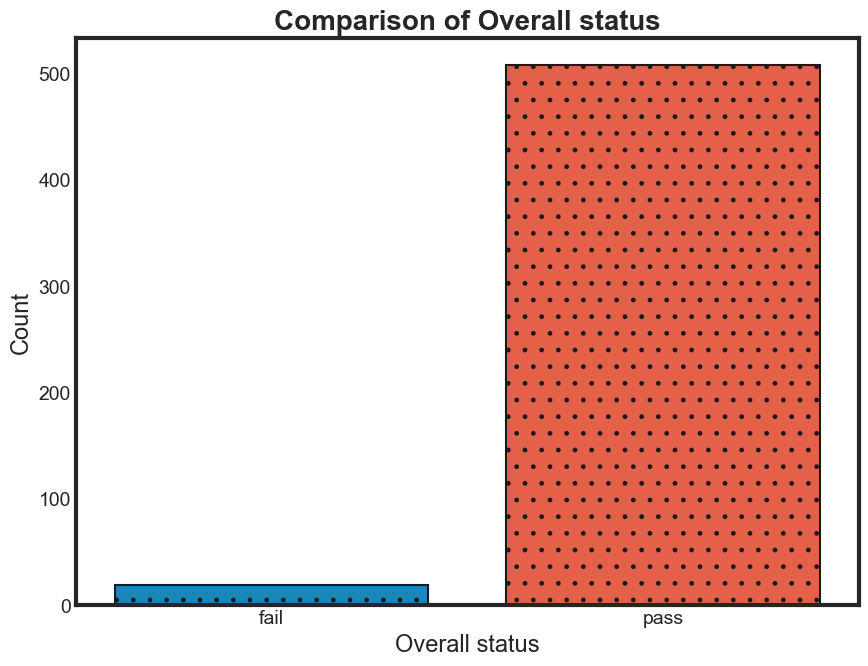

In [43]:
graph = sns.countplot(
    data, x="overall_status", edgecolor="0.1", linewidth=1.5, hatch="."
)
graph.set_title("Comparison of Overall status", weight="bold", fontsize=20)
graph.set_xlabel("Overall status", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

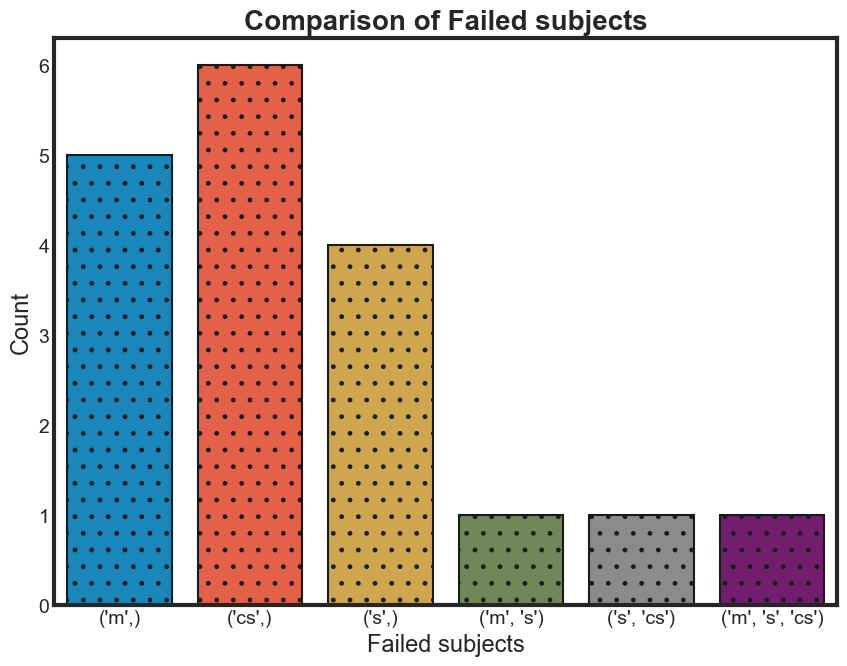

In [44]:
def get_fail_subject(row):
    subject = list()
    if row["maths"] == "F":
        subject.append("m")
    if row["stats"] == "F":
        subject.append("s")
    if row["comp_sci"] == "F":
        subject.append("cs")
    if len(subject) <= 0:
        return pd.NA
    return tuple(subject)


data["failed subjects"] = data.apply(get_fail_subject, axis=1)
data["failed subjects"].head()

graph = sns.countplot(
    data, x="failed subjects", edgecolor="0.1", linewidth=1.5, hatch="."
)
graph.set_title("Comparison of Failed subjects", weight="bold", fontsize=20)
graph.set_xlabel("Failed subjects", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Overall GPA')

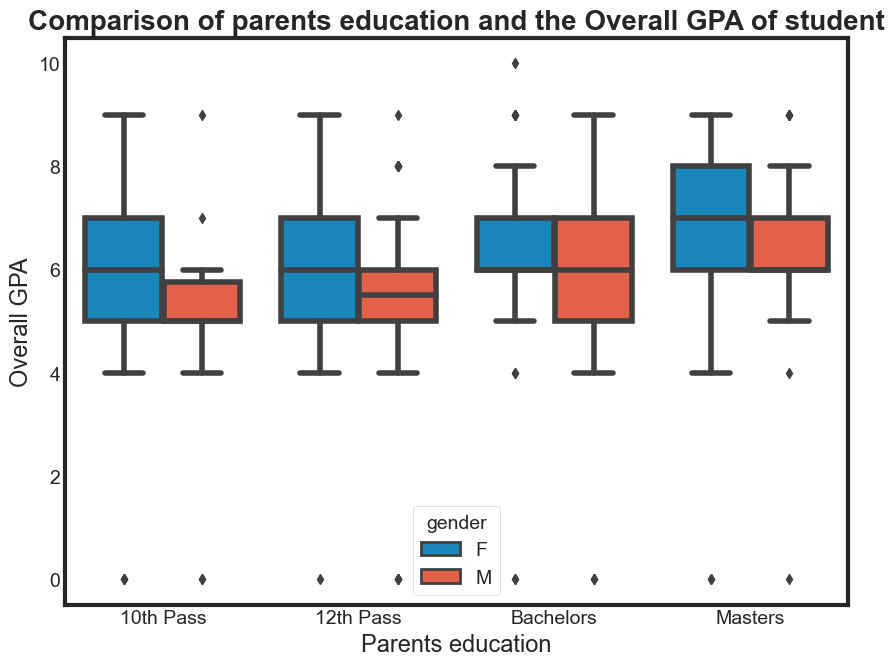

In [72]:
graph = sns.boxplot(data, x="parentedu", y="overall_gpa", hue="gender")
graph.set_title(
    "Comparison of parents education and the Overall GPA of student",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel("Parents education", fontweight=20, fontsize=17)
graph.set_ylabel("Overall GPA", fontweight=20, fontsize=17)


Text(0, 0.5, 'Studytime')

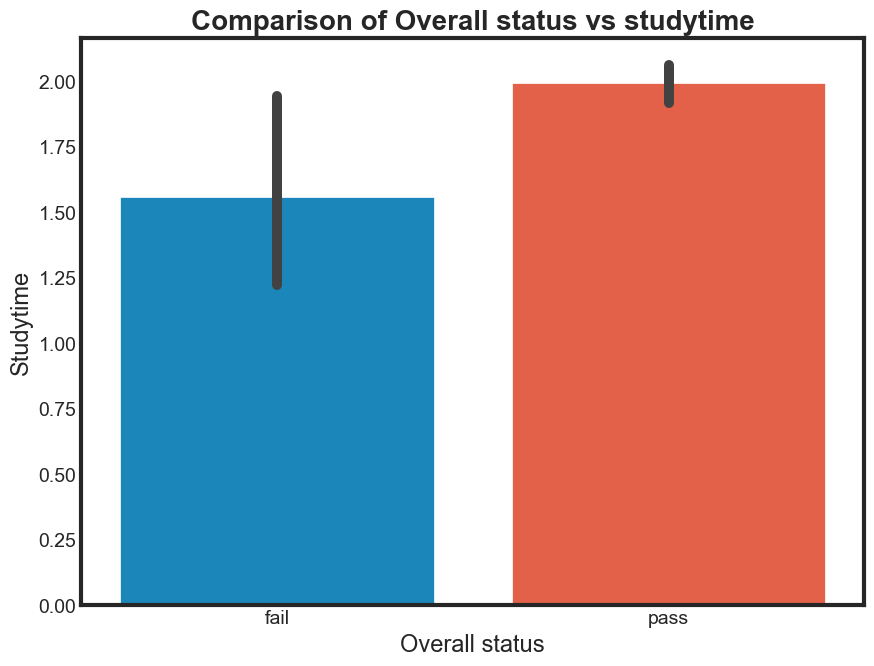

In [46]:
graph = sns.barplot(data, x="overall_status", y="studytime")
graph.set_title(
    "Comparison of Overall status vs studytime",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel("Overall status", fontweight=20, fontsize=17)
graph.set_ylabel("Studytime", fontweight=20, fontsize=17)


Text(0, 0.5, 'Hangouts per week')

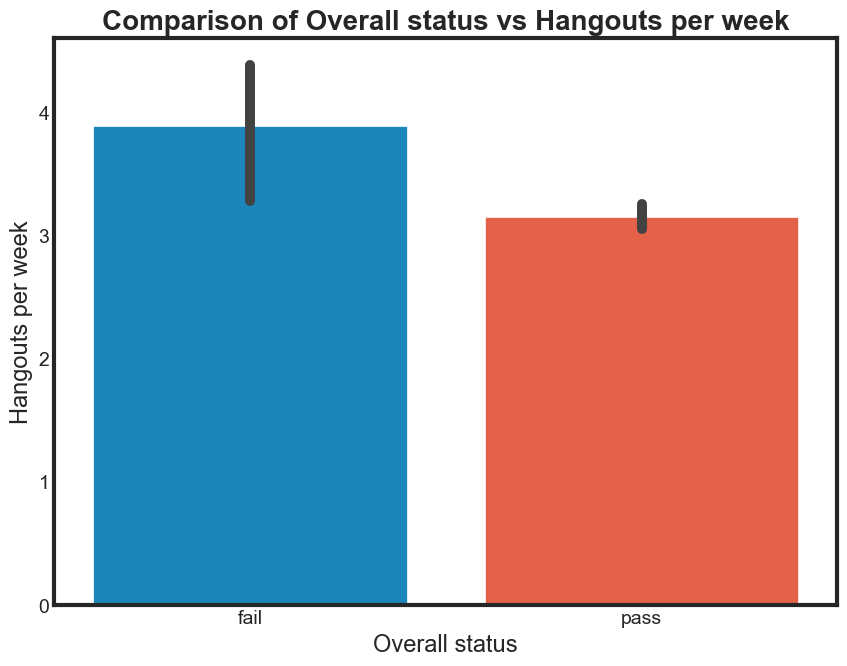

In [47]:
graph = sns.barplot(data, x="overall_status", y="hangouts_p_week")
graph.set_title(
    "Comparison of Overall status vs Hangouts per week",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel("Overall status", fontweight=20, fontsize=17)
graph.set_ylabel("Hangouts per week", fontweight=20, fontsize=17)


Text(0, 0.5, 'Absences')

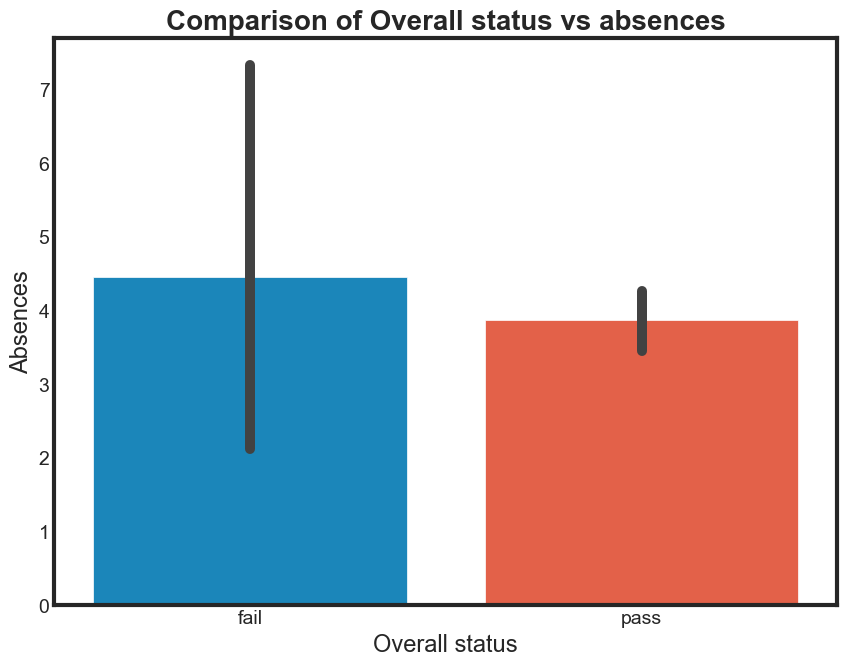

In [48]:
graph = sns.barplot(data, x="overall_status", y="absences")
graph.set_title(
    "Comparison of Overall status vs absences",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel("Overall status", fontweight=20, fontsize=17)
graph.set_ylabel("Absences", fontweight=20, fontsize=17)


Text(0.5, 20.583333333333293, 'activities')

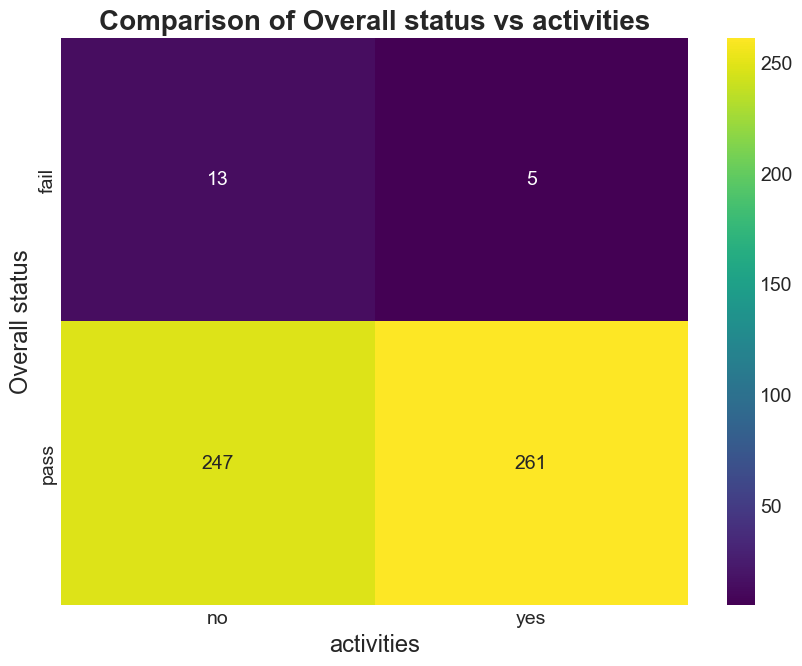

In [49]:
ct = pd.crosstab(data["overall_status"], data["activities"])
graph = sns.heatmap(ct, annot=True, cmap="viridis", fmt="g")
graph.set_title(
    "Comparison of Overall status vs activities",
    weight="bold",
    fontsize=20,
)
graph.set_ylabel("Overall status", fontweight=20, fontsize=17)
graph.set_xlabel("activities", fontweight=20, fontsize=17)


Text(0.5, 20.583333333333293, 'Parental Education')

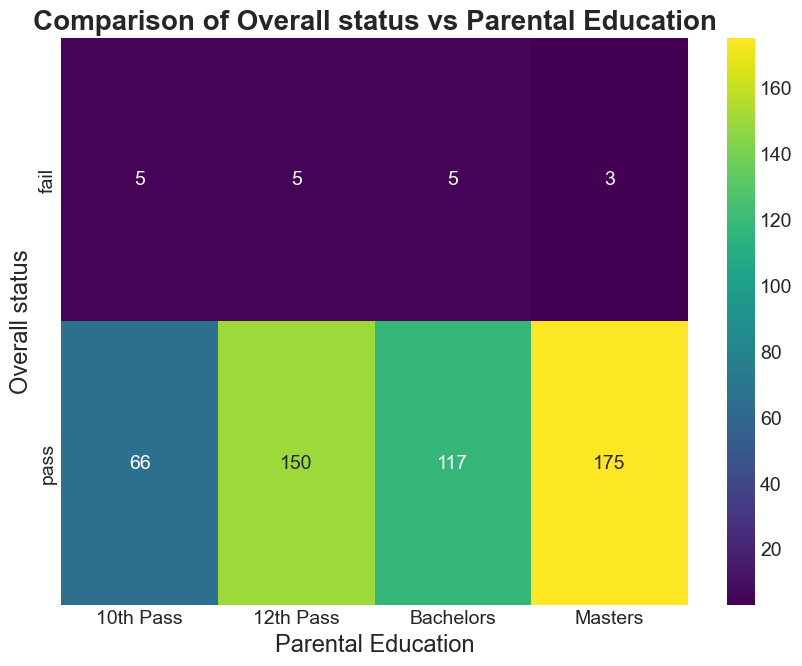

In [50]:
ct = pd.crosstab(data["overall_status"], data["parentedu"])
graph = sns.heatmap(ct, annot=True, cmap="viridis", fmt="g")
graph.set_title(
    "Comparison of Overall status vs Parental Education",
    weight="bold",
    fontsize=20,
)
graph.set_ylabel("Overall status", fontweight=20, fontsize=17)
graph.set_xlabel("Parental Education", fontweight=20, fontsize=17)


## Encoding data
